# Introduction

The Titanic dataset is a famous dataset in machine learning and data analysis, containing data on the passengers aboard the Titanic and their survival status. It consists of a training dataset with 891 observations and a test dataset with 418 observations. The goal is to use machine learning techniques to predict the survival of passengers on the Titanic based on their variables in the training dataset.The notebook will begin with an exploration of the dataset and data preparation, including handling missing values and visualization. Then, we will train and evaluate various machine learning models to predict survival and compare their performance. The goal is to achieve the highest possible accuracy in predicting survival and gain insights into the factors that contributed to passengers' survival on the Titanic.

### Understanding the Variables.


Before we can begin analyzing the Titanic dataset, it's important to understand what each variable represents. The dataset contains the following variables :

PassengerId: A unique identifier for each passenger.

Survived: Whether or not the passenger survived (0 = No, 1 = Yes).

Pclass: The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

Name: The name of the passenger.

Sex: The gender of the passenger.

Age: The age of the passenger in years. Fractional values are included for infants.

SibSp: The number of siblings/spouses aboard the Titanic.

Parch: The number of parents/children aboard the Titanic.

Ticket: The ticket number for the passenger.

Fare: The fare paid by the passenger.

Cabin: The cabin number for the passenger (if available).

Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).



# Preperation and Visulization.

In [1]:
# Import libraries.
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the training dataset.
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Load the test dataset.
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
# See the first 5 rows in the data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Seeing the data information. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handle the missing data.

In [5]:
# How many null values in the data?
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Seeing the size of the data.
train.shape

(891, 12)

Cabin has 687 null value and all the data is 891 that is, about 77% of the data so we will drop this column, 
Embarked has just 2 null values so we delet these rows and Age has 177 null values so we will fill them.

In [7]:
# Drop unimportant data.
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
# Drop the rows that have null values in Embarked.
train.dropna(subset = ["Embarked"], inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

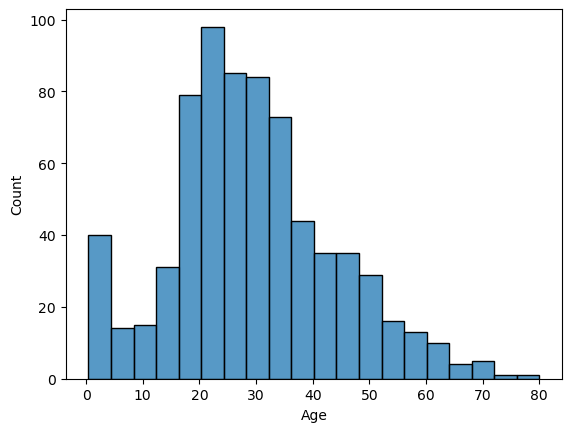

In [9]:
# Seeing the histogram for age.
sns.histplot(train['Age'])

The histogram is almost normal so we fill the null values for age with the mean.

In [10]:
# Calculate the mean for male.
mean_male = train.loc[train['Sex'] == 'male', 'Age'].mean()
mean_male

30.72664459161148

In [11]:
# Calculate the mean for female.
mean_female = train.loc[train['Sex'] == 'female', 'Age'].mean()
mean_female

27.745173745173744

In [12]:
# Fill the null values in age column for male with their mean.
train.loc[train['Sex'] == 'male', 'Age'] = train[train['Sex'] == 'male']['Age'].fillna(value = mean_male)

# Fill the null values in age column for female with their mean.
train.loc[train['Sex'] == 'female', 'Age'] = train[train['Sex'] == 'female']['Age'].fillna(value = mean_female)

In [13]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Seeing the relation between survived and other features.

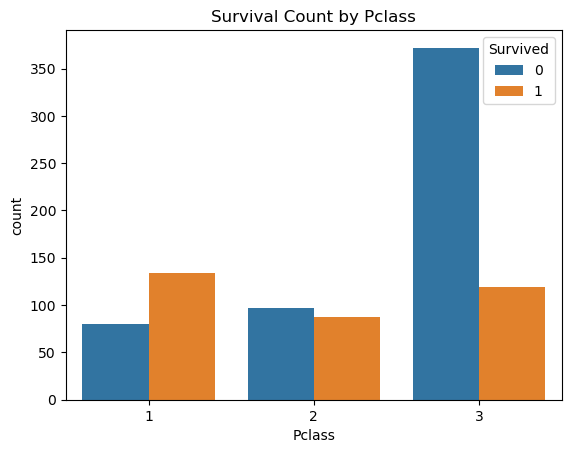

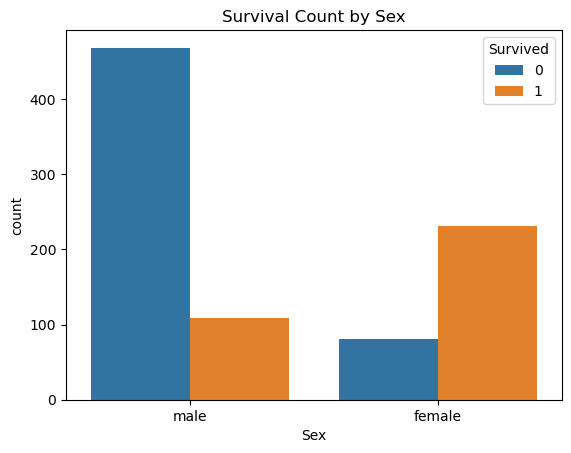

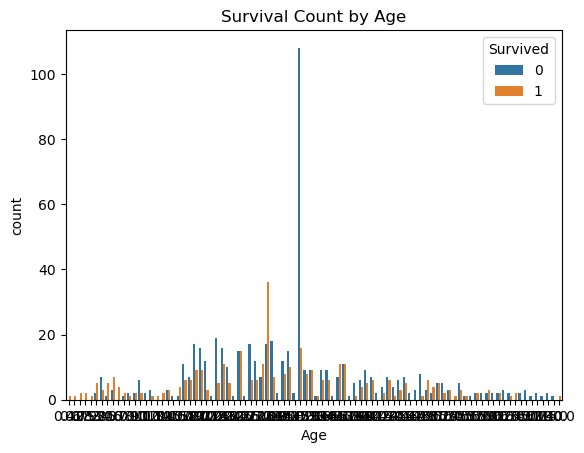

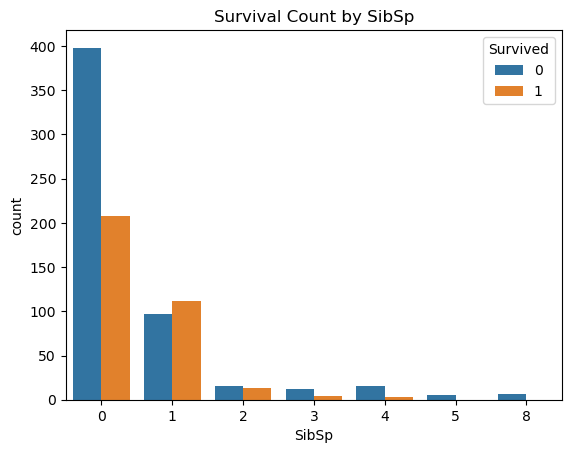

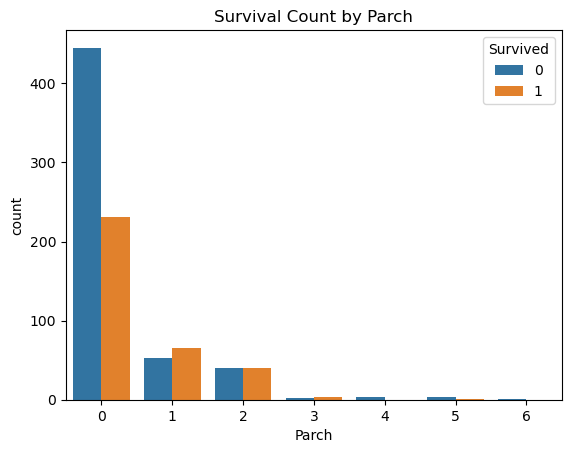

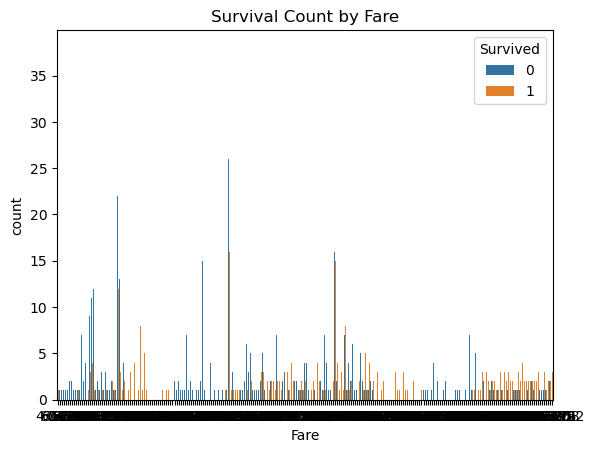

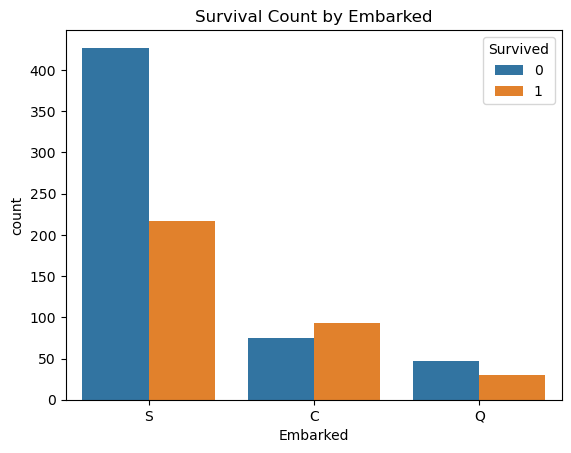

In [14]:
# Plot graphs that show the number of passengers who survived and who did not survive for each columns.
for feature in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    title='Survival Count by ' + feature
    sns.countplot(data=train, x=feature, hue='Survived')
    plt.title(title)
    plt.show()

Shown in figers that "Sibsp and Parch" They are not very influential so we will drop those columns.

In [15]:
# Drop Sibsp and Parch columns.
train.drop(['SibSp', 'Parch'], axis=1, inplace= True)

In [16]:
# Encode categorical variables.
train.replace({'Sex': {'male': 0, 'female': 1},
                   'Embarked': {'S': 0, 'Q': 1, 'C': 2}}, inplace=True)

In [17]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,2
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


### Scale numerical variables.

In [18]:
# Select numerical columns to scale.
num_cols = ['Age', 'Fare']

# Create scaler object.
scaler = StandardScaler()

# Fit scaler on selected columns.
scaler.fit(train[num_cols])

# Transform selected columns with scaler.
train[num_cols] = scaler.transform(train[num_cols])


In [19]:
# Split data into x and y.
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling.

In [20]:
# Initialize the models.
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [21]:
# Iterate over each model and evaluate its accuracy using cross-validation.
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy = scores.mean()
    print(f'{model_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.79322367773072
Decision Tree Accuracy: 0.7834925637742539
Random Forest Accuracy: 0.8228503890475721
SVM Accuracy: 0.7847926721166157


Random forest has the best accuracy so we use for modeling.

### Using grid search to defined the best parameters for random forest algorithm.

In [22]:
# Define the parameter grid.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of the model.
model = RandomForestClassifier()

# Create an instance of GridSearchCV.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the data.
grid_search.fit(X_train, y_train)

# Get the best hyperparameters.
best_params = grid_search.best_params_

# Print the best hyperparameters.
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [23]:
# Make tha random forest model with specific best hyperparameters.
model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200)

# Fit the model.
model.fit(X_train, y_train)

# Predict y-predict.
y_pred = model.predict(X_test)

# Evaluate the accuracy of y-predict.
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.820


# Preperation the test data.

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Handle the missing values in the test data.

In [25]:
# How many null values in the data?
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
# Fill the null values in age column for male with their mean.
test.loc[test['Sex'] == 'male', 'Age'] = test[test['Sex'] == 'male']['Age'].fillna(value = mean_male)

# Fill the null values in age column for female with their mean.
test.loc[test['Sex'] == 'female', 'Age'] = test[test['Sex'] == 'female']['Age'].fillna(value = mean_female)

In [27]:
# Calculate the mean for fare.
mean_fare = test["Fare"].mean()

In [28]:
# Fill the null values in fare column its mean.
test["Fare"].fillna(value = mean_fare, inplace = True)

In [29]:
#Store the PassengerId column in a separate variable.
PassengerId = test['PassengerId']

In [30]:
# Drop unimportant data.
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace= True)

In [31]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

### Preperation the test data before using model.

In [32]:
# Encode categorical variables.
test.replace({'Sex': {'male': 0, 'female': 1},
                   'Embarked': {'S': 0, 'Q': 1, 'C': 2}}, inplace=True)

In [33]:
# Select numerical columns to scale.
num_cols = ['Age', 'Fare']

# Create scaler object.
scaler = StandardScaler()

# Fit scaler on selected columns.
scaler.fit(test[num_cols])

# Transform selected columns with scaler.
test[num_cols] = scaler.transform(test[num_cols])


# Prediction and submission.

In [34]:
#Generate predictions for the test data using RandomForestClassifier.
test_pred = model.predict(test)

In [35]:
# Make the submission data frame.
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': test_pred})

In [36]:
# Convert the submission data frame to CSV file.
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Conclusion

In conclusion, we started by exploring the Titanic dataset and understanding the variables involved in it. We then performed data cleaning, and data preprocessing to prepare the data for modeling. We used different machine learning algorithms such as Decision Tree, Random Forest, Support Vector Machines (SVM), and Logistic Regression to predict the survival of passengers.

We compared the accuracy of the models. We found that Random Forest gave the best results and we tuned the hyperparameters to improve this performance.

Finally, we used the trained model to predict the survival of passengers in the test dataset and submitted the results to Kaggle.

Overall, this project gave us a good understanding of data preprocessing, machine learning algorithms, and model tuning techniques. It was a great learning experience and helped us develop practical data science skills.